In [5]:
import pygeos
import sys
sys.path.append("../")
from eo_tilematcher.eo_tilematcher import intersects
import geopandas as gpd
from matplotlib import pyplot as plt

def plot_sentinel2_tiles(gdf_sentinel, figsize_=(12, 12), ax=None):
    if ax is None:
        f, ax = plt.subplots(1, 1, figsize=figsize_)
        gdf_sentinel.plot(ax=ax, facecolor="none", edgecolor="k", lw=3)
    else:
        gdf_sentinel.plot(
            ax=ax, facecolor="none", edgecolor="k", lw=3, figsize=figsize_
        )
    for index, r in gdf_sentinel.iterrows():
        geom_x, geom_y = r["geometry"].centroid.x, r["geometry"].centroid.y
        name = "Tile Name {}".format(r.Name)
        ax.text(geom_x, geom_y, name)

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    return ax

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

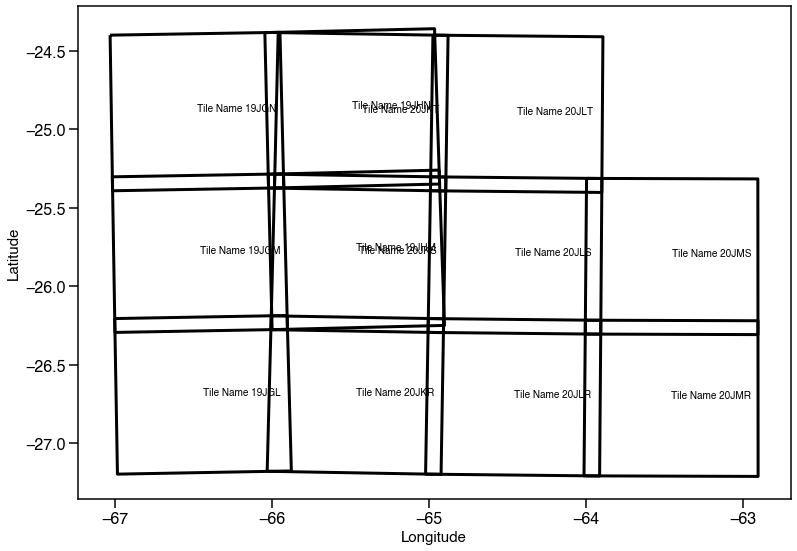

In [13]:
tile, geoms = intersects("sentinel2", pygeos.creation.box(-64, -27, -66, -25))
sentinel = gpd.GeoDataFrame(dict(Name=tile, geometry=geoms))
plot_sentinel2_tiles(sentinel)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

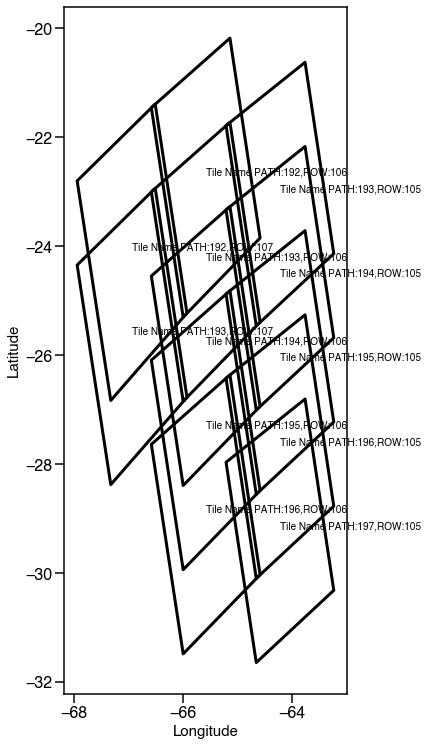

In [14]:
tile, geoms = intersects("landsat5", pygeos.creation.box(-64, -27, -66, -25))
landsat5 = gpd.GeoDataFrame(dict(Name=tile, geometry=geoms))
plot_sentinel2_tiles(landsat5)